In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import math

In [2]:
def loss_plot(folders, file, seed, y_label, save_file_name):
    # Load iterations and loss data from each folder
    data = []
    
    for folder in folders:
        iterations = np.load(os.path.join('..',"analysis_results", folder, 'iteration_list.npy'))
        loss = np.load(os.path.join('..',"analysis_results", folder, file))
        
        # Initialize list to store average loss per epoch
        epoch_losses = []
        n_epochs = 20000
        n_iters_per_epoch = math.ceil(len(iterations)/n_epochs)
        # Calculate average loss for each epoch
        for epoch in range(n_epochs):
            start_idx = epoch * n_iters_per_epoch
            end_idx = (epoch + 1) * n_iters_per_epoch
            avg_loss = np.mean(loss[start_idx:end_idx])
            epoch_losses.append(avg_loss)
        
        label = folder.replace(seed, "")  # Remove "seed=0" from the folder name
        label = label.replace("ntrain=", "$N_{train}=$").replace("neval=", "$N_{eval}=$").replace("-", ", ")
        data.append((epoch_losses, label))

    # Plot the losses
    plt.figure(figsize=(10, 6))
    for i, (epoch_losses, label) in enumerate(data):
        plt.plot(range(1, n_epochs + 1), epoch_losses, label=label)

    plt.yscale("log")
    plt.xlabel('Epochs', fontsize=18)  # Increase font size of x-axis label
    plt.ylabel(y_label + ' Loss', fontsize=18)  # Increase font size of y-axis label
    plt.legend(title='Training settings', fontsize=14, title_fontsize=16)  # Increase font size of legend text and title
    plt.tick_params(axis='both', which='major', labelsize=14)  # Increase font size of tick labels
    plt.savefig(os.path.join(os.getcwd(), "figures", save_file_name))
    plt.show()
    
    # plt.ylabel('Average ' + y_label + ' Loss per Epoch')
    # plt.title('Losses from Different Folders')
    # plt.grid(True)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Set x-axis tick label format to scientific notation

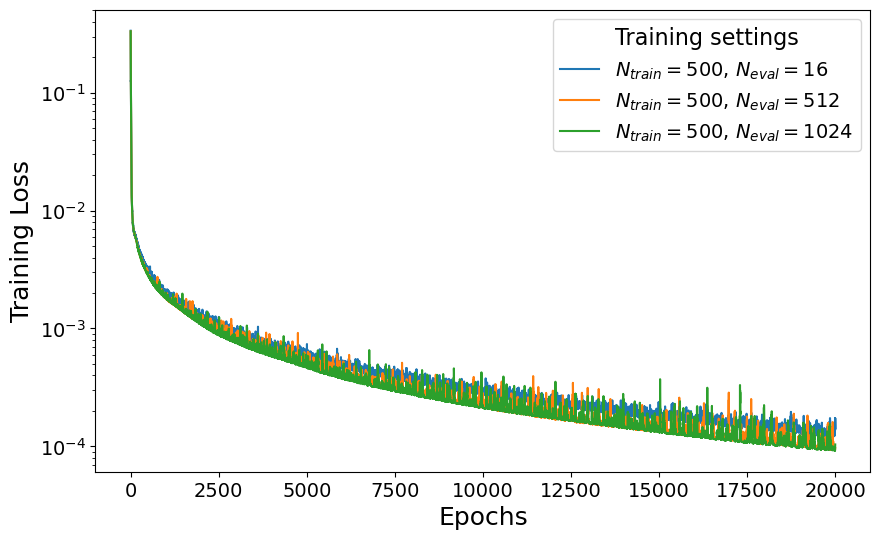

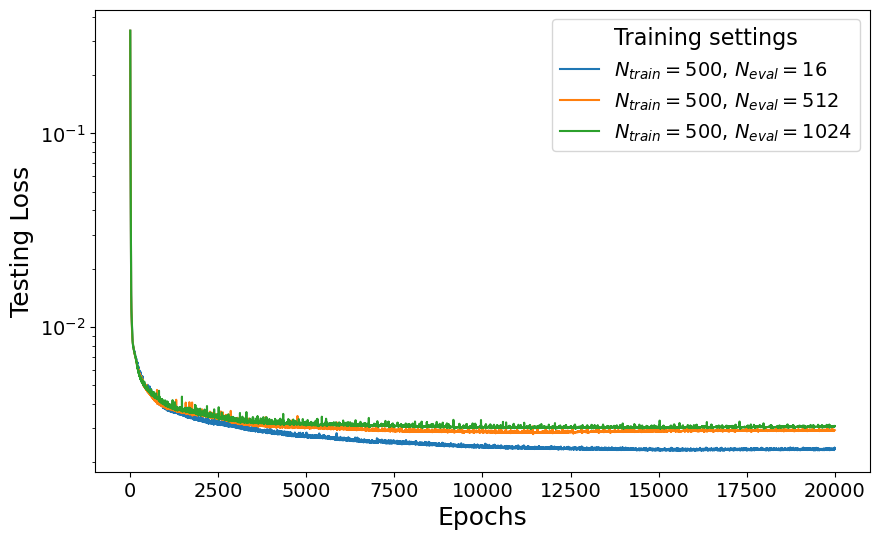

In [3]:
# Define the folders
folders = ["ntrain=500-neval=16-seed=0", "ntrain=500-neval=512-seed=0", "ntrain=500-neval=1024-seed=0"]
loss_plot(folders, 'train_loss_list.npy','-seed=0', 'Training', 'ntrain=500_train_losses_epoch.pdf')
loss_plot(folders, 'test_loss_list.npy','-seed=0', 'Testing', 'ntrain=500_test_losses_epoch.pdf')

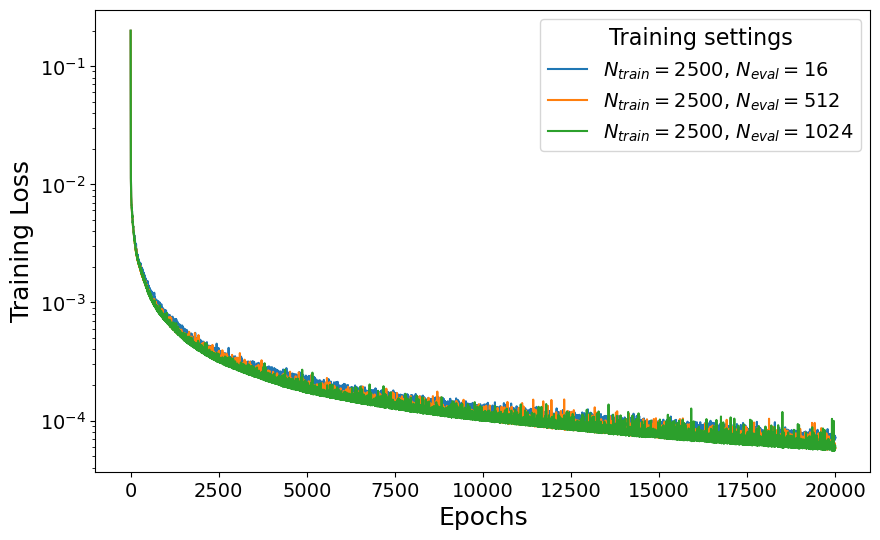

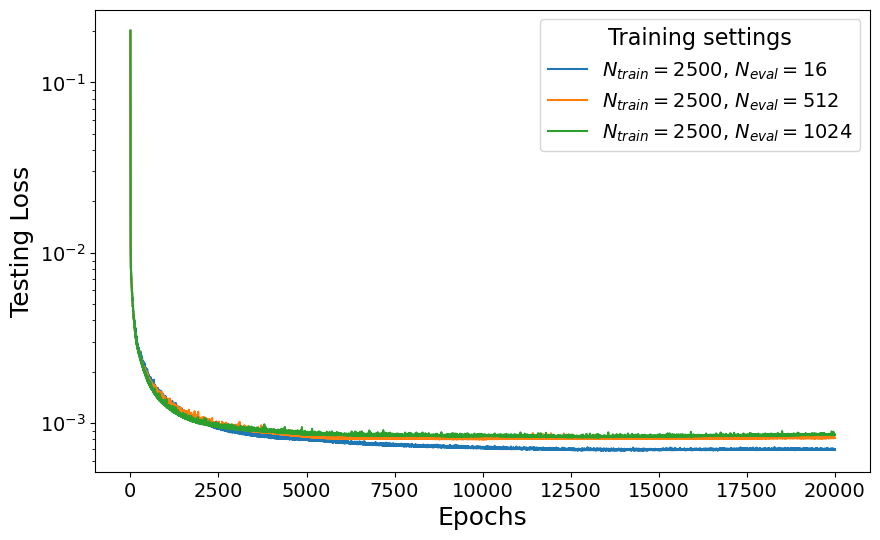

In [4]:
# Define the folders
folders = ["ntrain=2500-neval=16-seed=0", "ntrain=2500-neval=512-seed=0", "ntrain=2500-neval=1024-seed=0"]
loss_plot(folders, 'train_loss_list.npy','-seed=0', 'Training', 'ntrain=2500_train_losses_epoch.pdf')
loss_plot(folders, 'test_loss_list.npy','-seed=0', 'Testing', 'ntrain=2500_test_losses_epoch.pdf')

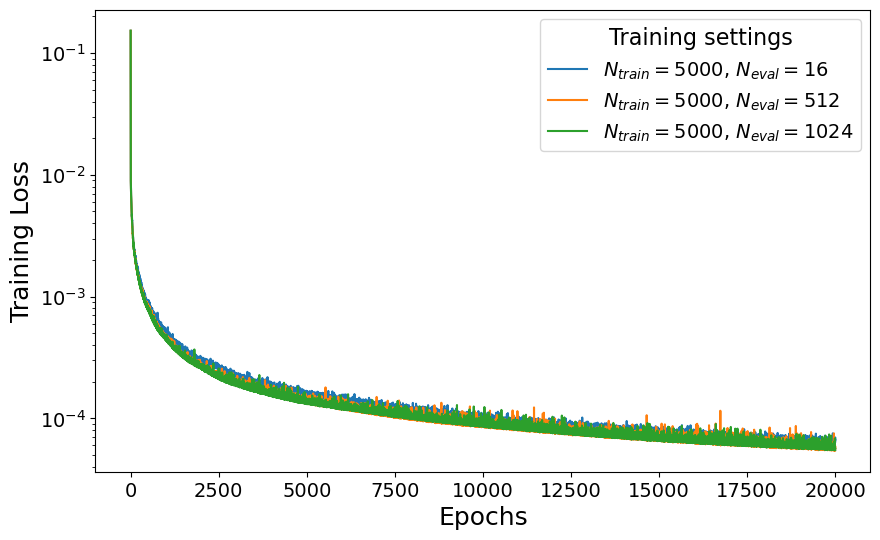

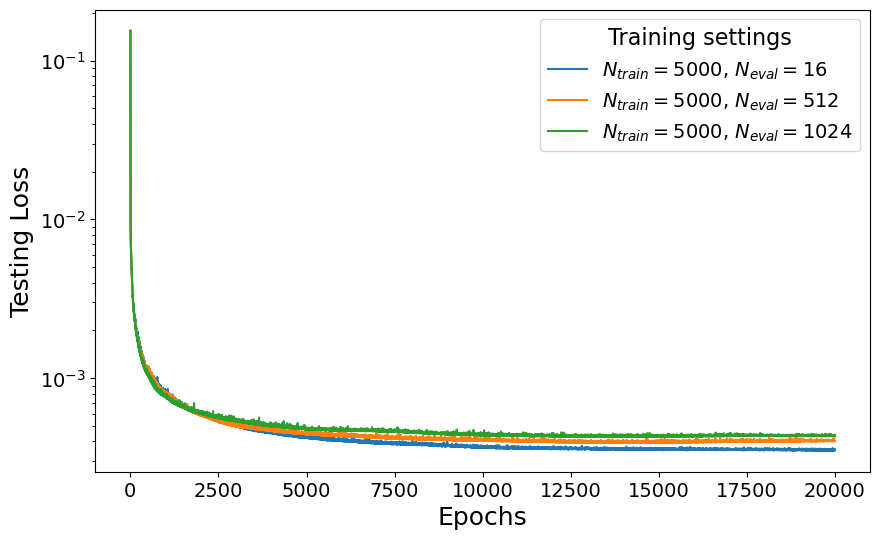

In [5]:
# Define the folders
folders = ["ntrain=5000-neval=16-seed=0", "ntrain=5000-neval=512-seed=0", "ntrain=5000-neval=1024-seed=0"]
loss_plot(folders, 'train_loss_list.npy','-seed=0', 'Training', 'ntrain=5000_train_losses_epoch.pdf')
loss_plot(folders, 'test_loss_list.npy','-seed=0', 'Testing', 'ntrain=5000_test_losses_epoch.pdf')